# Training Analysis M.Graf from Garmin Connect

## Data Import

In [1]:
# Refresh data for this notebook
!python3 gc.py

DEBUG:garminconnect:login: None uswjqiLZGA4E7sLMRvxbEc
DEBUG:garminconnect:URL: https://sso.garmin.com/sso/signin
DEBUG:garminconnect:Headers: {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0', 'NK': 'NT', 'Referer': 'https://connect.garmin.com/en-US/signin'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): sso.garmin.com:443
DEBUG:urllib3.connectionpool:https://sso.garmin.com:443 "GET /sso/signin?service=https%3A%2F%2Fconnect.garmin.com%2Fmodern&webhost=https%3A%2F%2Fconnect.garmin.com&source=https%3A%2F%2Fconnect.garmin.com%2Fen-US%2Fsignin&redirectAfterAccountLoginUrl=https%3A%2F%2Fconnect.garmin.com%2Fmodern&redirectAfterAccountCreationUrl=https%3A%2F%2Fconnect.garmin.com%2Fmodern&gauthHost=https%3A%2F%2Fsso.garmin.com%2Fsso&locale=en_US&id=gauth-widget&cssUrl=https%3A%2F%2Fstatic.garmincdn.com%2Fcom.garmin.connect%2Fui%2Fcss%2Fgauth-custom-v1.2-min.css&privacyStatementUrl=%2F%2Fconnect.garmin.com%2Fen-US%2Fprivacy%2F

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

tmp = pd.read_json('./data/all_activities.json',
                   convert_dates=['startTimeLocal'])
all_activities = pd.concat(
    [tmp.drop(['activityType'], axis=1), tmp['activityType'].apply(pd.Series)], axis=1)

In [4]:
all_activities.drop(columns=['description', 
                                'comments', 
                                'ownerId',      
                                'ownerDisplayName',
                                'ownerFullName',
                                'ownerProfileImageUrlSmall',
                                'ownerProfileImageUrlMedium',
                                'ownerProfileImageUrlLarge',
                                'ownerId',
                                'ownerDisplayName',
                                'ownerFullName',
                                'startLatitude',
                                'startLongitude',
                                'ownerProfileImageUrlSmall',
                                'ownerProfileImageUrlMedium',
                                'ownerProfileImageUrlLarge',
                                'conversationUuid',
                                'conversationPk',
                                'numberOfActivityLikes',
                                'numberOfActivityComments',
                                'likedByUser',
                                'commentedByUser',
                                'activityLikeDisplayNames',
                                'activityLikeFullNames',
                                'activityLikeProfileImageUrls',
                                'requestorRelationship',
                                'userRoles',
                                'privacy',
                                'userPro',
                                'avgWheelchairCadence',
                                'maxWheelchairCadence',
                                'isHidden',
                                'sortOrder',
                                'restricted',
                                'trimmable'],inplace=True)



In [5]:
all_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Columns: 162 entries, activityId to parentTypeId
dtypes: bool(12), datetime64[ns](1), float64(128), int64(8), object(13)
memory usage: 429.8+ KB


## Start of Analysis

### Quick Stats

In [6]:
all_activities.columns

Index(['activityId', 'activityName', 'startTimeLocal', 'startTimeGMT',
       'eventType', 'parentId', 'distance', 'duration', 'elapsedDuration',
       'movingDuration',
       ...
       'manualActivity', 'autoCalcCalories', 'elevationCorrected',
       'atpActivity', 'favorite', 'decoDive', 'parent', 'typeId', 'typeKey',
       'parentTypeId'],
      dtype='object', length=162)

In [7]:
# Gesamte Zeitdauer Sport
print(f"Die gesamte Trainingsdauer über alle Aktivitätstypen hinweg beträgt: \n {round(all_activities.movingDuration.sum()/60/60, 2)} h")

Die gesamte Trainingsdauer über alle Aktivitätstypen hinweg beträgt: 
 381.61 h


In [8]:
totals = all_activities[['typeKey',
                        'distance',
                        'duration',
                        'elapsedDuration',
                         'movingDuration']].pivot_table(columns=['typeKey'])

activity_types = list(totals.columns)[1:]

In [9]:
totals = all_activities[['typeKey',
                        'distance',
                         'duration',
                         'elapsedDuration',
                         'movingDuration']]


In [10]:
totals.typeKey.value_counts()

running                          119
cycling                           96
virtual_ride                      47
lap_swimming                      40
hiking                            14
yoga                              12
walking                            9
indoor_cycling                     8
other                              8
strength_training                  3
resort_skiing_snowboarding_ws      3
multi_sport                        2
open_water_swimming                2
Name: typeKey, dtype: int64

In [11]:
all_activities['startTime_week'] = all_activities.startTimeLocal.dt.isocalendar().week

In [12]:
all_activities.head()

,activityId,activityName,startTimeLocal,startTimeGMT,eventType,parentId,distance,duration,elapsedDuration,movingDuration,...,autoCalcCalories,elevationCorrected,atpActivity,favorite,decoDive,parent,typeId,typeKey,parentTypeId,startTime_week
0,10030559149,Mannheim Cycling,2022-11-24 08:40:02,2022-11-24 07:40:02,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,11815.129883,2567.800049,33398.875000,2517.000000,...,False,False,False,False,False,False,2,cycling,17,47
1,10027698872,Mannheim Running,2022-11-24 07:23:05,2022-11-24 06:23:05,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,4472.750000,1764.927979,1764.927979,1764.251984,...,False,False,False,False,False,False,1,running,17,47
2,10018287189,Mannheim Cycling,2022-11-22 09:54:26,2022-11-22 08:54:26,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,12572.070312,2666.160889,14227.295898,2637.000000,...,False,False,False,False,False,False,2,cycling,17,47
3,10016886522,Mannheim - AZUM Training 22 November 2022,2022-11-22 07:12:31,2022-11-22 06:12:31,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,6126.459961,2542.210938,2565.876953,2535.923012,...,False,False,False,False,False,False,1,running,17,47
4,10016619728,Mannheim Cycling,2022-11-21 08:15:14,2022-11-21 07:15:14,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,11326.669922,2340.228027,79470.734375,2304.000000,...,False,False,False,False,False,False,2,cycling,17,47


In [13]:
week_view = all_activities.groupby(by=['startTime_week', 'typeKey']).sum().reset_index()

In [14]:
week_view

,startTime_week,typeKey,activityId,parentId,distance,duration,elapsedDuration,movingDuration,elevationGain,elevationLoss,...,pr,manualActivity,autoCalcCalories,elevationCorrected,atpActivity,favorite,decoDive,parent,typeId,parentTypeId
0,1,lap_swimming,24208807153,0.0,7700.000000,10660.637939,11401.953125,8996.445068,0.00,0.00,...,0,0,0,0,0,0,0,0,81,78
1,1,other,16148611876,0.0,0.000000,2754.229858,2754.229858,0.000000,0.00,0.00,...,0,0,0,0,0,0,0,0,8,34
2,1,running,32301142864,0.0,34020.750000,13374.132812,13393.131836,13320.040000,38.70,54.50,...,0,0,0,0,0,0,0,0,4,68
3,1,virtual_ride,32265614530,0.0,134531.908203,16063.502197,16094.000000,15899.000000,1047.00,0.00,...,0,0,0,0,0,0,0,0,608,8
4,2,lap_swimming,8122782523,0.0,2250.000000,3190.316895,3545.364990,2765.623047,0.00,0.00,...,0,0,0,0,0,0,0,0,27,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,47,cycling,30065466066,0.0,35713.870117,7574.188965,127096.905273,7458.000000,140.21,120.53,...,0,0,0,0,0,0,0,0,6,51
166,47,running,20044585394,0.0,10599.209961,4307.138916,4330.804932,4300.174995,40.23,34.06,...,0,0,0,0,0,0,0,0,2,34
167,52,indoor_cycling,8049737829,0.0,28806.839844,5004.357910,5053.600098,4996.779000,0.00,0.00,...,0,0,0,0,0,0,0,0,25,2
168,52,running,8041256508,0.0,9530.330078,3650.092041,3710.405029,3646.461014,77.56,75.76,...,0,0,0,0,0,0,0,0,1,17


In [15]:
curr_cal_week = 47

In [16]:
week_view['movingDurationMin'] = week_view['movingDuration']/60


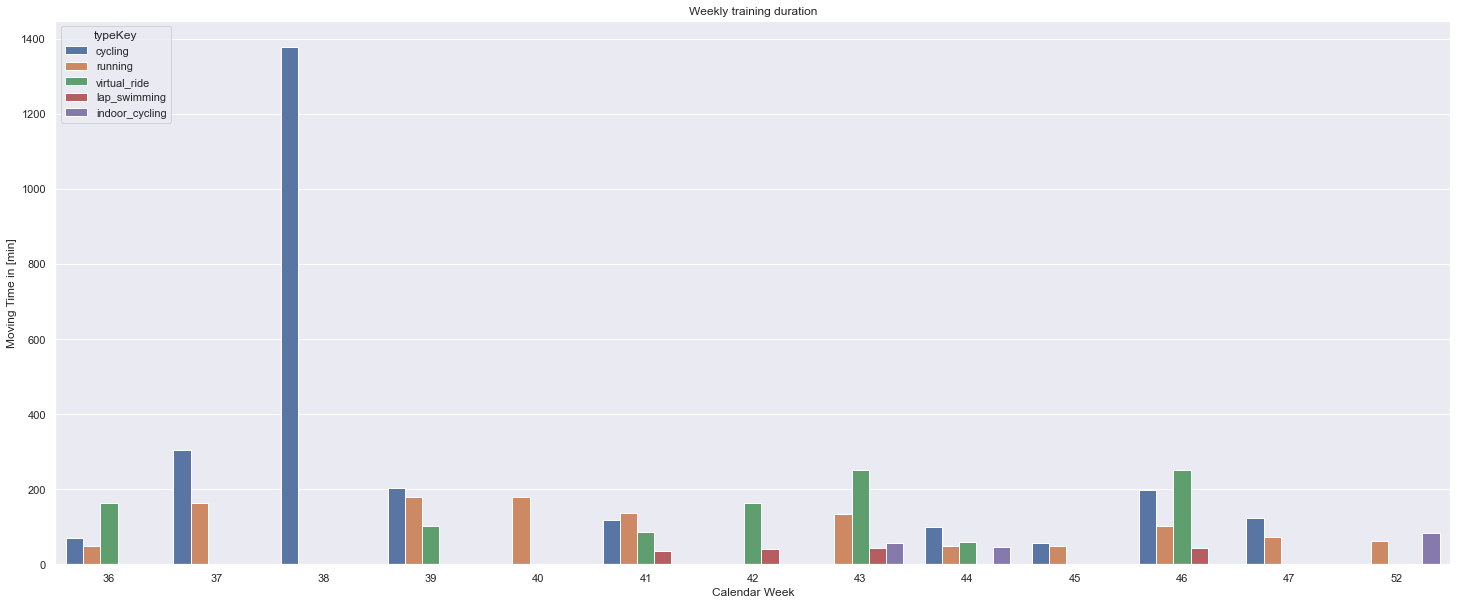

In [22]:
sns.set(rc={'figure.figsize': (25, 10)})

sns.barplot(data=week_view.loc[week_view.typeKey.isin(['lap_swimming', 'running', 'cycling', 'virtual_ride', 'indoor_cycling']) & (week_view.startTime_week > curr_cal_week - 12)], x="startTime_week",
            y="movingDurationMin", hue='typeKey')

plt.title('Weekly training duration')
plt.ylabel('Moving Time in [min]')
plt.xlabel('Calendar Week')

plt.show()

<AxesSubplot:xlabel='startTime_week', ylabel='movingDurationMin'>

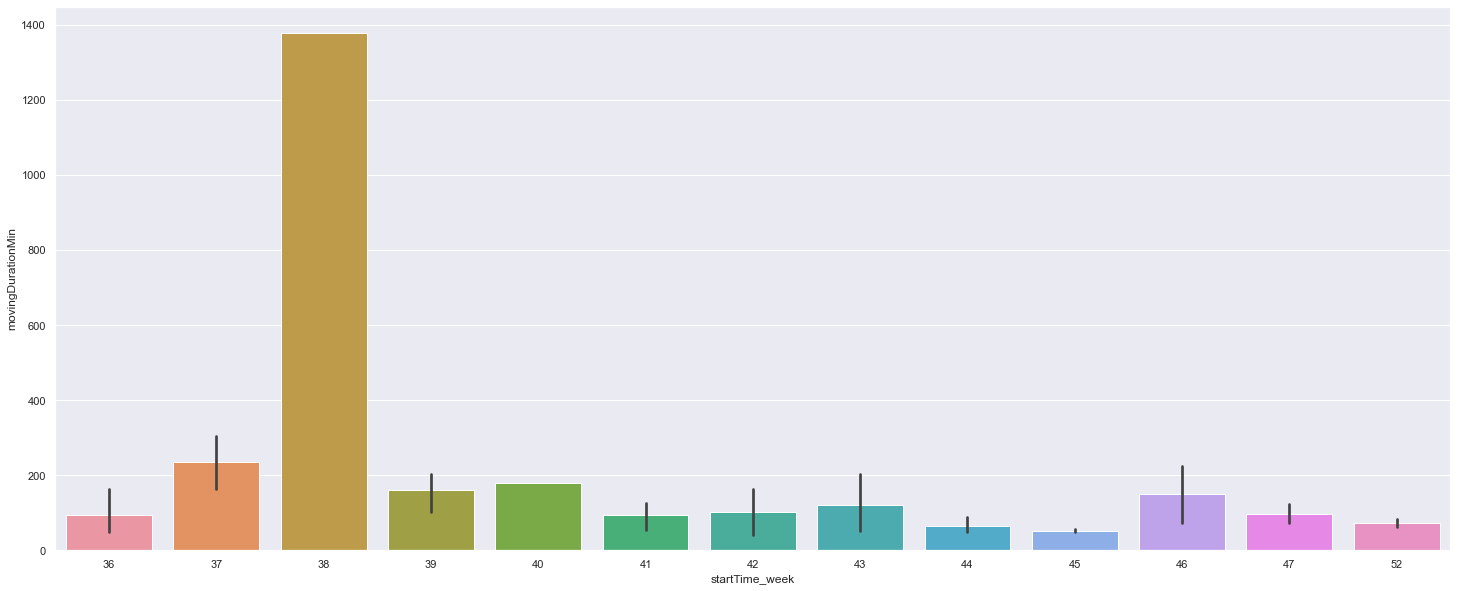

In [23]:
sns.barplot(data=week_view.loc[week_view.typeKey.isin(['lap_swimming', 'running', 'cycling', 'virtual_ride', 'indoor_cycling']) & (week_view.startTime_week > curr_cal_week - 12)], x="startTime_week",
            y="movingDurationMin")
plt.show()

## Analyse HF/Pace

In [18]:
runs = all_activities.loc[all_activities.typeKey == 'running']
runs.head()

,activityId,activityName,startTimeLocal,startTimeGMT,eventType,parentId,distance,duration,elapsedDuration,movingDuration,...,autoCalcCalories,elevationCorrected,atpActivity,favorite,decoDive,parent,typeId,typeKey,parentTypeId,startTime_week
1,10027698872,Mannheim Running,2022-11-24 07:23:05,2022-11-24 06:23:05,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,4472.750000,1764.927979,1764.927979,1764.251984,...,False,False,False,False,False,False,1,running,17,47
3,10016886522,Mannheim - AZUM Training 22 November 2022,2022-11-22 07:12:31,2022-11-22 06:12:31,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,6126.459961,2542.210938,2565.876953,2535.923012,...,False,False,False,False,False,False,1,running,17,47
6,10007969379,Mannheim Running,2022-11-20 12:55:12,2022-11-20 11:55:12,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,8198.530273,3373.891113,3470.620117,3363.569000,...,False,False,False,False,False,False,1,running,17,46
13,9979031688,Mannheim - AZUM Training 15 November 2022,2022-11-15 07:24:22,2022-11-15 06:24:22,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,7483.379883,2778.023926,2969.291016,2768.805019,...,False,False,False,False,False,False,1,running,17,46
16,9969953796,Mannheim - Base,2022-11-13 14:48:49,2022-11-13 13:48:49,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,7228.000000,2871.866943,2871.866943,2867.026001,...,False,False,False,False,False,False,1,running,17,45


In [26]:
list(runs.columns)

['activityId',
 'activityName',
 'startTimeLocal',
 'startTimeGMT',
 'eventType',
 'parentId',
 'distance',
 'duration',
 'elapsedDuration',
 'movingDuration',
 'elevationGain',
 'elevationLoss',
 'averageSpeed',
 'maxSpeed',
 'hasPolyline',
 'calories',
 'averageHR',
 'maxHR',
 'averageRunningCadenceInStepsPerMinute',
 'maxRunningCadenceInStepsPerMinute',
 'averageBikingCadenceInRevPerMinute',
 'maxBikingCadenceInRevPerMinute',
 'averageSwimCadenceInStrokesPerMinute',
 'maxSwimCadenceInStrokesPerMinute',
 'averageSwolf',
 'activeLengths',
 'steps',
 'courseId',
 'poolLength',
 'unitOfPoolLength',
 'hasVideo',
 'videoUrl',
 'timeZoneId',
 'beginTimestamp',
 'sportTypeId',
 'avgPower',
 'maxPower',
 'aerobicTrainingEffect',
 'anaerobicTrainingEffect',
 'strokes',
 'normPower',
 'leftBalance',
 'rightBalance',
 'avgLeftBalance',
 'max20MinPower',
 'avgVerticalOscillation',
 'avgGroundContactTime',
 'avgStrideLength',
 'avgFractionalCadence',
 'maxFractionalCadence',
 'trainingStressScore

In [19]:
runs['averageSpeedKmh'] = runs['averageSpeed']*3.6
runs['SpeedOverHR'] = runs['averageSpeedKmh']/runs['averageHR']

/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_2260/3153899752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['averageSpeedKmh'] = runs['averageSpeed']*3.6
/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_2260/3153899752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['SpeedOverHR'] = runs['averageSpeedKmh']/runs['averageHR']


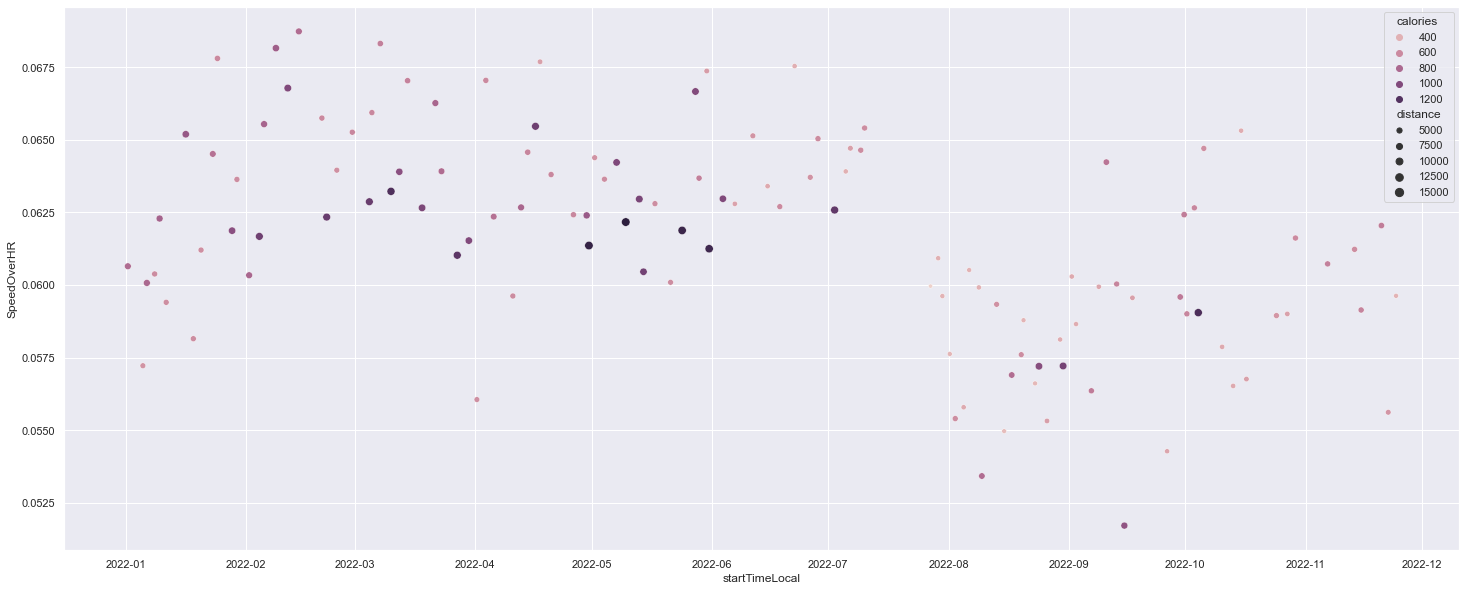

In [28]:
sns.scatterplot(data=runs, x='startTimeLocal', y='SpeedOverHR', hue='calories', size='distance', s=10)
plt.show()

## Bike Analysis

In [29]:
bikes = all_activities.loc[all_activities.typeKey.isin(['virtual_ride', 'indoor_cycling', 'cycling'])]
bikes.head()

,activityId,activityName,startTimeLocal,startTimeGMT,eventType,parentId,distance,duration,elapsedDuration,movingDuration,...,autoCalcCalories,elevationCorrected,atpActivity,favorite,decoDive,parent,typeId,typeKey,parentTypeId,startTime_week
0,10030559149,Mannheim Cycling,2022-11-24 08:40:02,2022-11-24 07:40:02,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,11815.129883,2567.800049,33398.875000,2517.0,...,False,False,False,False,False,False,2,cycling,17,47
2,10018287189,Mannheim Cycling,2022-11-22 09:54:26,2022-11-22 08:54:26,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,12572.070312,2666.160889,14227.295898,2637.0,...,False,False,False,False,False,False,2,cycling,17,47
4,10016619728,Mannheim Cycling,2022-11-21 08:15:14,2022-11-21 07:15:14,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,11326.669922,2340.228027,79470.734375,2304.0,...,False,False,False,False,False,False,2,cycling,17,47
5,10008612038,Zwift - AZUM Training November 20 2022 in Maku...,2022-11-20 14:05:36,2022-11-20 13:05:36,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,40363.300781,5470.000000,5469.000000,5467.0,...,False,False,False,False,False,False,152,virtual_ride,2,46
7,9996098187,Zwift - AZUM Training November 18 2022 in Rich...,2022-11-18 09:44:16,2022-11-18 08:44:16,"{'typeId': 9, 'typeKey': 'uncategorized', 'sor...",NaN,35508.199219,4213.000000,4212.000000,4208.0,...,False,False,False,False,False,False,152,virtual_ride,2,46
